<h1> Getting started </h1>
<h2> -- Python and Jupyter Notebook basics </h2>

#Turn in one report per group covering:

Team meeting and communication plan
Choice of a data set from the instructor-provided options
If needed, choice of a data set from students’ own data, subject to instructor approval
PLEASE email the instructor your own data set by Friday, 9/10
Since the instructor is also part time, please use great caution to exclude any trade secret and/or proprietary information. 
Turn in a Jupyter Notebook (upload the .ipynb file to iCollege), one per team, in which you:

Investigate your team’s data set.
Generate summary statistics for all continuous and categorical variables.
Choose a continuous variable and bin it. Explain in the comments (#) why you have chosen to bin the variable in the way that you did.
Convert a text categorical variable to a numerical categorical variable, or vice versa if you don’t have a text categorical variable.
Use groupby, crosstabs, and bar plots to explore differences across groupings within your data. Run at least one groupby function and at least one crosstab function and plot the results.


<h2> -- Installing packages and importing libraries </h2>

In [2]:
# Install required packages -- note that these are already included in the Anaconda distribution
!pip install pandas 
!pip install matplotlib
!pip install seaborn

# Pandas is a package for creating and manipulating data frames.
# Matplotlib is a plotting/graphing package.
# Seaborn is a data visualization package.

In [7]:
# Import libraries associated with the packages you installed
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

print("Finished!")

Finished!


# Selected airbnb_nyc_trimmed as team's dataset for exploration

<h1> Ingesting data </h1>

In [11]:
# Read in data and create data frame; call it "reviews"
#picked up data set airbnb_nyc
#Investigate your team’s data set.
reviews = pd.read_csv("airbnb_nyc_trimmed.csv")

In [12]:
reviews # Look at your data frame

,id,name,description,host_name,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighborhood,neighborhood_detail,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,free_parking,wifi,pets,gym,breakfast,kid_friendly
0,4951402,Best Location on the UWS!!,"Clean cozy room on the UWS, a minute walk to t...",Sasha,f,2,t,t,Manhattan,Upper West Side,...,f,flexible,f,f,f,t,t,f,f,t
1,16103920,The Executive Loft Manhattan,This wonderful apartment is located on a prime...,Francisco,f,1,t,f,Manhattan,Chelsea,...,f,strict_14_with_grace_period,f,f,f,t,f,f,f,t
2,35803621,TRANQUIL HAVEN-8 MINS TO JFK/LIRR/AIRTRAIN RM#2.,This spacious bedroom with shared bath is loca...,Sharon,f,2,t,t,Queens,Jamaica,...,f,moderate,f,f,f,t,f,f,f,f
3,12223531,Spacious and sun-drenched bedroom,Spacious and sun-drenched bedroom in Williamsb...,Mimi,f,2,t,t,Brooklyn,Williamsburg,...,f,flexible,f,f,f,t,f,f,f,f
4,34120534,"Sunlit Apartment in the ""Friends Building""",Spacious sun soaked one bedroom apartment in t...,Vaughn,f,1,t,f,West Village,West Village,...,f,flexible,f,f,t,t,t,f,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28715332,TRIBECA/SOHO 2 BEDROOM LUXURY LOFT,TYPICAL SOHO/TRIBECA NYC LOFT Very quiet luxur...,Roberto,f,1,t,f,Manhattan,Tribeca,...,f,strict_14_with_grace_period,f,f,f,t,f,f,f,f
996,29098862,Quite room. 15 mins to JFK & 20 mins to Manhattan,Private room perfect for lone traveler or quad...,Michael,f,1,t,f,East New York,Cypress Hills,...,f,moderate,f,f,f,t,f,f,f,f
997,3819656,SoHo/Village Studio,Warm and spacious studio with lots of light an...,Russell,f,1,t,t,Manhattan,Greenwich Village,...,f,moderate,f,f,f,t,f,f,f,f
998,27529564,Queen size bedroom,Our modest home in a Classic Elevator Buildin...,Nour,f,3,t,f,Harlem,Harlem,...,f,flexible,f,f,f,t,f,f,f,f


In [13]:
# Generate a snapshot of the dataframe
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1000 non-null   int64  
 1   name                              1000 non-null   object 
 2   description                       988 non-null    object 
 3   host_name                         1000 non-null   object 
 4   host_is_superhost                 1000 non-null   object 
 5   host_total_listings_count         1000 non-null   int64  
 6   host_has_profile_pic              1000 non-null   object 
 7   host_identity_verified            1000 non-null   object 
 8   neighborhood                      999 non-null    object 
 9   neighborhood_detail               1000 non-null   object 
 10  borough                           1000 non-null   object 
 11  zipcode                           991 non-null    object 
 12  market 

#   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1000 non-null   int64   - This is just an identifier
 1   name                              1000 non-null   object  - I can remove this from data set as this will not provide anylitical insight
 2   description                       988 non-null    object - same with this field
 3   host_name                         1000 non-null   object - This field can also go
 4   host_is_superhost                 1000 non-null   object -This appear boolean
 5   host_total_listings_count         1000 non-null   int64  
 6   host_has_profile_pic              1000 non-null   object 
 7   host_identity_verified            1000 non-null   object 
 8   neighborhood                      999 non-null    object 
 9   neighborhood_detail               1000 non-null   object 
 10  borough                           1000 non-null   object 
 11  zipcode                           991 non-null    object 
 12  market                            997 non-null    object 
 13  latitude                          1000 non-null   float64
 14  longitude                         1000 non-null   float64
 15  is_location_exact                 1000 non-null   object 
 16  property_type                     1000 non-null   object 
 17  room_type                         1000 non-null   object 
 18  accommodates                      1000 non-null   int64  
 19  bathrooms                         997 non-null    float64
 20  bedrooms                          999 non-null    float64
 21  beds                              999 non-null    float64
 22  bed_type                          1000 non-null   object 
 23  price                             1000 non-null   int64  
 24  guests_included                   1000 non-null   int64  
 25  extra_people                      1000 non-null   int64  
 26  minimum_nights                    1000 non-null   int64  
 27  maximum_nights                    1000 non-null   int64  
 28  maximum_nights_avg_ntm            1000 non-null   float64
 29  calendar_updated                  1000 non-null   object 
 30  availability_365                  1000 non-null   int64  
 31  number_of_reviews                 1000 non-null   int64  
 32  review_scores_rating              1000 non-null   int64  
 33  instant_bookable                  1000 non-null   object 
 34  is_business_travel_ready          1000 non-null   object 
 35  cancellation_policy               1000 non-null   object 
 36  require_guest_profile_picture     1000 non-null   object 
 37  require_guest_phone_verification  1000 non-null   object 
 38  free_parking                      1000 non-null   object 
 39  wifi                              1000 non-null   object 
 40  pets                              1000 non-null   object 
 41  gym                               1000 non-null   object 
 42  breakfast                         1000 non-null   object 
 43  kid_friendly                      1000 non-null   object 

<h1> Summary statistics </h1>

In [17]:
# Generate summary statistics for all continuous variables in your dataframe
#five method summary. Python will do type inference and try to see what data type and anything that's numeric, provide numerical summary
# exclue all verbose or words
#which column should be numeric and which column 
reviews.describe()

# Note that year appears in this table -- why do you think that is?

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,maximum_nights_avg_ntm,availability_365,number_of_reviews,review_scores_rating
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,997.000000,999.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.851992e+07,8.059000,40.727794,-73.951883,2.88400,1.140923,1.178178,1.543544,137.422000,1.595000,16.230000,5.413000,566.311000,555.957700,107.469000,31.664000,93.384000
std,1.087172e+07,48.542455,0.053622,0.045017,1.87191,0.451404,0.769069,1.084531,125.591884,1.234706,24.374232,15.584457,534.170972,533.571828,125.808453,52.021797,9.136193
min,7.801000e+03,0.000000,40.575680,-74.154780,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000
25%,9.393585e+06,1.000000,40.689453,-73.982262,2.00000,1.000000,1.000000,1.000000,67.000000,1.000000,0.000000,1.000000,28.000000,28.000000,0.000000,3.000000,91.000000
50%,1.888265e+07,1.000000,40.721155,-73.953950,2.00000,1.000000,1.000000,1.000000,100.000000,1.000000,10.000000,2.000000,365.000000,365.000000,43.000000,10.000000,96.000000
75%,2.815093e+07,2.000000,40.760755,-73.932263,4.00000,1.000000,1.000000,2.000000,165.000000,2.000000,25.000000,4.000000,1125.000000,1125.000000,217.000000,36.000000,100.000000
max,3.684677e+07,760.000000,40.896040,-73.712990,16.00000,6.500000,7.000000,13.000000,1500.000000,12.000000,300.000000,365.000000,1125.000000,1125.000000,365.000000,521.000000,100.000000


Bin a variable beds into twop categories  
Choose a continuous variable and bin it. Explain in the comments (#) why you have chosen to bin the variable in the way that you did.
Since this is a nyc data . my expectation and inttuition was that there will be more smaller apartments., so I did bin using number of beds to see that correlation if indeed less number of beds are more common

In [20]:
reviews["beds"].describe()

count    999.000000
mean       1.543544
std        1.084531
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       13.000000
Name: beds, dtype: float64

In [22]:
avg_apartment_size = ['average and below', 'above average']
avg_bins = [-100, 1.543544, 100]
reviews['apartment_size'] = pd.cut(reviews['beds'], bins=avg_bins, labels=avg_apartment_size)
reviews

,id,name,description,host_name,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighborhood,neighborhood_detail,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,free_parking,wifi,pets,gym,breakfast,kid_friendly,apartment_size
0,4951402,Best Location on the UWS!!,"Clean cozy room on the UWS, a minute walk to t...",Sasha,f,2,t,t,Manhattan,Upper West Side,...,flexible,f,f,f,t,t,f,f,t,average and below
1,16103920,The Executive Loft Manhattan,This wonderful apartment is located on a prime...,Francisco,f,1,t,f,Manhattan,Chelsea,...,strict_14_with_grace_period,f,f,f,t,f,f,f,t,above average
2,35803621,TRANQUIL HAVEN-8 MINS TO JFK/LIRR/AIRTRAIN RM#2.,This spacious bedroom with shared bath is loca...,Sharon,f,2,t,t,Queens,Jamaica,...,moderate,f,f,f,t,f,f,f,f,average and below
3,12223531,Spacious and sun-drenched bedroom,Spacious and sun-drenched bedroom in Williamsb...,Mimi,f,2,t,t,Brooklyn,Williamsburg,...,flexible,f,f,f,t,f,f,f,f,average and below
4,34120534,"Sunlit Apartment in the ""Friends Building""",Spacious sun soaked one bedroom apartment in t...,Vaughn,f,1,t,f,West Village,West Village,...,flexible,f,f,t,t,t,f,f,f,average and below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28715332,TRIBECA/SOHO 2 BEDROOM LUXURY LOFT,TYPICAL SOHO/TRIBECA NYC LOFT Very quiet luxur...,Roberto,f,1,t,f,Manhattan,Tribeca,...,strict_14_with_grace_period,f,f,f,t,f,f,f,f,above average
996,29098862,Quite room. 15 mins to JFK & 20 mins to Manhattan,Private room perfect for lone traveler or quad...,Michael,f,1,t,f,East New York,Cypress Hills,...,moderate,f,f,f,t,f,f,f,f,average and below
997,3819656,SoHo/Village Studio,Warm and spacious studio with lots of light an...,Russell,f,1,t,t,Manhattan,Greenwich Village,...,moderate,f,f,f,t,f,f,f,f,average and below
998,27529564,Queen size bedroom,Our modest home in a Classic Elevator Buildin...,Nour,f,3,t,f,Harlem,Harlem,...,flexible,f,f,f,t,f,f,f,f,average and below


In [39]:
reviews[["beds", "apartment_size"]]

,beds,apartment_size
0,1.0,average and below
1,3.0,above average
2,1.0,average and below
3,1.0,average and below
4,1.0,average and below
...,...,...
995,2.0,above average
996,1.0,average and below
997,1.0,average and below
998,1.0,average and below


Convert a text categorical variable to a numerical categorical variable, or vice versa if you don’t have a text categorical variable.
Convert borough into Numerical Manhattan 1 Bronx 2 Brooklyn 3 Queens 4 Staten Island 5

In [25]:
borough_dict = {'Manhattan': 1, 'Bronx':2,'Brooklyn': 3,'Queens' : 4,'Staten Island' : 5}
my_borough_num_col = []

for item in reviews.borough: 
    my_borough_num_col.append(borough_dict[item])
reviews['borough_num']= my_borough_num_col
reviews['borough_num']

0      1
1      1
2      4
3      3
4      1
      ..
995    1
996    3
997    1
998    1
999    4
Name: borough_num, Length: 1000, dtype: int64

In [29]:
reviews

,id,name,description,host_name,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighborhood,neighborhood_detail,...,require_guest_profile_picture,require_guest_phone_verification,free_parking,wifi,pets,gym,breakfast,kid_friendly,apartment_size,borough_num
0,4951402,Best Location on the UWS!!,"Clean cozy room on the UWS, a minute walk to t...",Sasha,f,2,t,t,Manhattan,Upper West Side,...,f,f,f,t,t,f,f,t,average and below,1
1,16103920,The Executive Loft Manhattan,This wonderful apartment is located on a prime...,Francisco,f,1,t,f,Manhattan,Chelsea,...,f,f,f,t,f,f,f,t,above average,1
2,35803621,TRANQUIL HAVEN-8 MINS TO JFK/LIRR/AIRTRAIN RM#2.,This spacious bedroom with shared bath is loca...,Sharon,f,2,t,t,Queens,Jamaica,...,f,f,f,t,f,f,f,f,average and below,4
3,12223531,Spacious and sun-drenched bedroom,Spacious and sun-drenched bedroom in Williamsb...,Mimi,f,2,t,t,Brooklyn,Williamsburg,...,f,f,f,t,f,f,f,f,average and below,3
4,34120534,"Sunlit Apartment in the ""Friends Building""",Spacious sun soaked one bedroom apartment in t...,Vaughn,f,1,t,f,West Village,West Village,...,f,f,t,t,t,f,f,f,average and below,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28715332,TRIBECA/SOHO 2 BEDROOM LUXURY LOFT,TYPICAL SOHO/TRIBECA NYC LOFT Very quiet luxur...,Roberto,f,1,t,f,Manhattan,Tribeca,...,f,f,f,t,f,f,f,f,above average,1
996,29098862,Quite room. 15 mins to JFK & 20 mins to Manhattan,Private room perfect for lone traveler or quad...,Michael,f,1,t,f,East New York,Cypress Hills,...,f,f,f,t,f,f,f,f,average and below,3
997,3819656,SoHo/Village Studio,Warm and spacious studio with lots of light an...,Russell,f,1,t,t,Manhattan,Greenwich Village,...,f,f,f,t,f,f,f,f,average and below,1
998,27529564,Queen size bedroom,Our modest home in a Classic Elevator Buildin...,Nour,f,3,t,f,Harlem,Harlem,...,f,f,f,t,f,f,f,f,average and below,1


In [38]:
#reviews.borough_num
reviews[["borough", "borough_num"]]

,borough,borough_num
0,Manhattan,1
1,Manhattan,1
2,Queens,4
3,Brooklyn,3
4,Manhattan,1
...,...,...
995,Manhattan,1
996,Brooklyn,3
997,Manhattan,1
998,Manhattan,1


In [40]:
cancellationpolicy_dict = {'flexible': 10, 'moderate':20,'strict_14_with_grace_period': 30,'super_strict_30' : 40}
my_cancellationpolicy_num_col = []

for item in reviews.cancellation_policy: 
    my_cancellationpolicy_num_col.append(cancellationpolicy_dict[item])
reviews['cancellationpolicy_num']= my_cancellationpolicy_num_col
reviews['cancellationpolicy_num']

0      10
1      30
2      20
3      10
4      10
       ..
995    30
996    20
997    20
998    10
999    30
Name: cancellationpolicy_num, Length: 1000, dtype: int64

In [41]:
#reviews.borough_num
reviews[["cancellation_policy", "cancellationpolicy_num"]]

,cancellation_policy,cancellationpolicy_num
0,flexible,10
1,strict_14_with_grace_period,30
2,moderate,20
3,flexible,10
4,flexible,10
...,...,...
995,strict_14_with_grace_period,30
996,moderate,20
997,moderate,20
998,flexible,10


Use groupby, crosstabs, and bar plots to explore differences across groupings within your data. Run at least one groupby function and at least one crosstab function and plot the results.

In [43]:
# Groupby
# Create reviews by cancellation policy
grouped_reviews = reviews['review_scores_rating'].groupby(reviews['cancellation_policy'])

In [44]:
# Run a function on the grouped data
grouped_reviews.describe()

,count,mean,std,min,25%,50%,75%,max
cancellation_policy,,,,,,,,
flexible,243.0,93.119342,10.143911,20.0,90.0,96.0,100.0,100.0
moderate,256.0,94.078125,8.076700,40.0,92.0,96.0,100.0,100.0
strict_14_with_grace_period,500.0,93.184000,9.120774,20.0,90.0,96.0,99.0,100.0
super_strict_30,1.0,80.000000,NaN,80.0,80.0,80.0,80.0,80.0


In [52]:
cancellationgroup_dict = {'flexible': 'Flexible', 'moderate':'Flexible','strict_14_with_grace_period': 'Not Flexible','super_strict_30' : 'Not Flexible'}
my_cancellationgroup_num_col = []

for item in reviews.cancellation_policy: 
    my_cancellationgroup_num_col.append(cancellationgroup_dict[item])
reviews['cancellationgroup']= my_cancellationgroup_num_col
reviews['cancellationgroup']

0          Flexible
1      Not Flexible
2          Flexible
3          Flexible
4          Flexible
           ...     
995    Not Flexible
996        Flexible
997        Flexible
998        Flexible
999    Not Flexible
Name: cancellationgroup, Length: 1000, dtype: object

In [53]:
reviews.cancellationgroup

0          Flexible
1      Not Flexible
2          Flexible
3          Flexible
4          Flexible
           ...     
995    Not Flexible
996        Flexible
997        Flexible
998        Flexible
999    Not Flexible
Name: cancellationgroup, Length: 1000, dtype: object

#crosstabs

In [54]:
# Cross tabulations
# cross table
pd.crosstab(reviews.review_scores_rating, reviews.cancellationgroup)

cancellationgroup,Flexible,Not Flexible
review_scores_rating,,
20,2,2
40,1,1
50,1,1
60,5,6
67,1,1
68,1,1
70,3,2
72,2,1
73,1,2


In [55]:
# Create a dataframe and pull index out into a column
crosstab_df = pd.DataFrame(pd.crosstab(reviews.review_scores_rating, reviews.cancellationgroup))
crosstab_df

cancellationgroup,Flexible,Not Flexible
review_scores_rating,,
20,2,2
40,1,1
50,1,1
60,5,6
67,1,1
68,1,1
70,3,2
72,2,1
73,1,2


In [56]:
# Create a clustered bar plot for visualization

# Transpose the dataframe
crosstab_df = crosstab_df.T
crosstab_df

review_scores_rating,20,40,50,60,67,68,70,72,73,75,...,91,92,93,94,95,96,97,98,99,100
cancellationgroup,,,,,,,,,,,,,,,,,,,,,
Flexible,2,1,1,5,1,1,3,2,1,1,...,18,16,34,19,31,30,25,39,15,157
Not Flexible,2,1,1,6,1,1,2,1,2,0,...,9,24,26,29,26,39,31,47,20,120


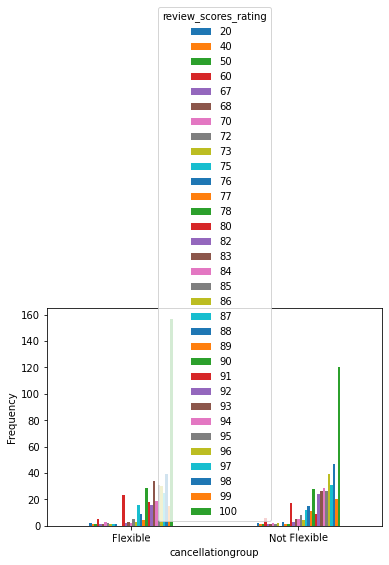

In [57]:
# Generate a clustered bar plot
crosstab_df.plot.bar(rot = 1)
plt.xlabel("cancellationgroup")
plt.ylabel("Frequency")
plt.show()